In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Lecture 10 ##

## Apply

In [4]:
help(max)

Help on built-in function max in module builtins:

max(...)
    max(iterable, *[, default=obj, key=func]) -> value
    max(arg1, arg2, *args, *[, key=func]) -> value
    
    With a single iterable argument, return its biggest item. The
    default keyword-only argument specifies an object to return if
    the provided iterable is empty.
    With two or more arguments, return the largest argument.



In [2]:
staff = Table().with_columns(
    'Employee', make_array('Jim', 'Dwight', 'Michael', 'Creed'),
    'Birth Year', make_array(1985, 1988, 1967, 1904)
)
staff

Employee,Birth Year
Jim,1985
Dwight,1988
Michael,1967
Creed,1904


In [5]:
def greeting(person):
    return 'Dunder Mifflin, this is ' + person # concatenating two strings here
 # the greeting, and the person's name (input)

In [6]:
greeting('Pam')

'Dunder Mifflin, this is Pam'

In [10]:
"'Dunder Mifflin, this is Pam'"

"'Dunder Mifflin, this is Pam'"

In [12]:
greeting('Erin!')

'Dunder Mifflin, this is Erin!'

In [14]:
Erin = 'Erin'
Erin

'Erin'

In [15]:
greeting(Erin)

'Dunder Mifflin, this is Erin'

In [18]:
staff_greetings = staff.apply(greeting, 'Employee')
staff_greetings

array(['Dunder Mifflin, this is Jim', 'Dunder Mifflin, this is Dwight',
       'Dunder Mifflin, this is Michael', 'Dunder Mifflin, this is Creed'],
      dtype='<U31')

In [23]:
# can you add the above greetings to a table?

staff_greetings_table = staff.with_columns('Greetings', staff_greetings)
staff_greetings_table
staff

Employee,Birth Year
Jim,1985
Dwight,1988
Michael,1967
Creed,1904


In [24]:
def name_and_age(name, year):
    age = 2022 - year
    return name + ' is ' + str(age)

In [28]:
2022 - 1985
# find Jim's age

37

In [31]:
1985 + 37
#i can't add and integer and a string

2022

In [35]:
ages_array = staff.apply(name_and_age, 'Employee', 'Birth Year')
ages_array

array(['Jim is 37', 'Dwight is 34', 'Michael is 55', 'Creed is 118'],
      dtype='<U13')

In [34]:
staff_age = staff.with_columns('Ages', ages_array)
staff_age

Employee,Birth Year,Ages
Jim,1985,Jim is 37
Dwight,1988,Dwight is 34
Michael,1967,Michael is 55
Creed,1904,Creed is 118


In [38]:
# how would you create a column with the ages, stored as an integer?
jims_age = '37'
jims_age = int(jims_age)
type(jims_age)

int

In [42]:
staff_age.apply(int, 'Ages')

ValueError: invalid literal for int() with base 10: 'Jim is 37'

In [43]:
int('30')

30

In [51]:
float('30')

30.0

## Prediction ##

In [79]:
galton = Table.read_table('data/galton.csv')
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


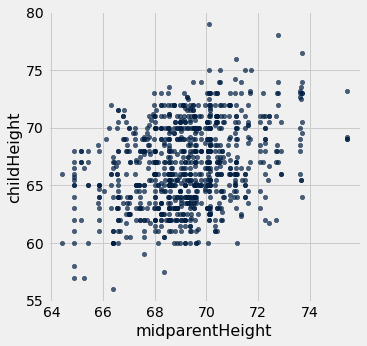

In [53]:
galton.scatter('midparentHeight', 'childHeight')
# compare these two quantitative variables
# in a sentence or two, how would you describe the relationship between
# the two variables?
# positive correlation, taller parents are, taller kids are

# dense in the middle, lots of data points esp between 68-70 inch (5'8" and 5'10")

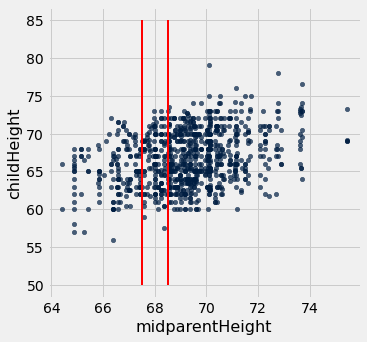

In [54]:
galton.scatter('midparentHeight', 'childHeight')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2);

In [57]:
nearby = galton.where('midparentHeight', are.between(67.5, 68.5))
nearby_mean = nearby.column('childHeight').mean()
nearby_mean
# The average height of children from parents who were 67.5-68.5 inches tall, 
# was 66.24 inches.

66.24045801526718

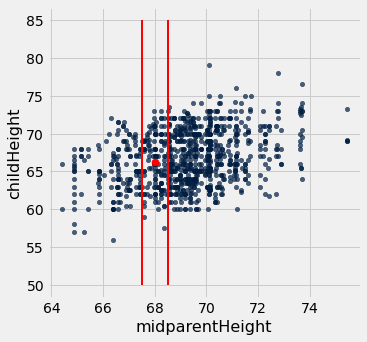

In [58]:
galton.scatter('midparentHeight', 'childHeight')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2)
plots.scatter(68, nearby_mean, color='red', s=50);

In [59]:
def predict(h):
    nearby = galton.where('midparentHeight', are.between(h - 1/2, h + 1/2))
    return nearby.column('childHeight').mean()

In [60]:
predict(68)
# The average height of children from midparentHeight of 67.5 - 68.5 inches tall,
# is 66.24 inches.

66.24045801526718

In [61]:
predict(70)

67.27285067873302

In [62]:
predict(73)

69.5

In [64]:
predicted_heights = galton.apply(predict, 'midparentHeight')
len(predicted_heights)

934

In [66]:
galton = galton.with_column('predictedHeight', predicted_heights)
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight,predictedHeight
1,78.5,67,75.43,4,1,male,73.2,70.1
1,78.5,67,75.43,4,2,female,69.2,70.1
1,78.5,67,75.43,4,3,female,69,70.1
1,78.5,67,75.43,4,4,female,69,70.1
2,75.5,66.5,73.66,4,1,male,73.5,70.4158
2,75.5,66.5,73.66,4,2,male,72.5,70.4158
2,75.5,66.5,73.66,4,3,female,65.5,70.4158
2,75.5,66.5,73.66,4,4,female,65.5,70.4158
3,75,64,72.06,2,1,male,71,68.5025
3,75,64,72.06,2,2,female,68,68.5025


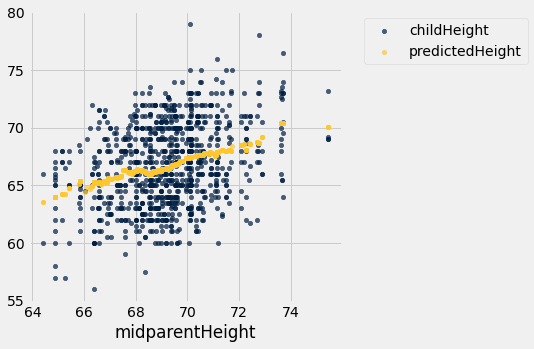

In [78]:
galton.select('midparentHeight', 'childHeight','predictedHeight').scatter('midparentHeight')

In [72]:
help(Table.scatter)

Help on function scatter in module datascience.tables:

scatter(self, column_for_x, select=None, overlay=True, fit_line=False, group=None, labels=None, sizes=None, width=None, height=None, s=20, **vargs)
    Creates scatterplots, optionally adding a line of best fit. Redirects to ``Table#iscatter``
    if interactive plots are enabled with ``Table#interactive_plots``
    
    args:
        ``column_for_x`` (``str``): the column to use for the x-axis values
            and label of the scatter plots.
    
    kwargs:
        ``overlay`` (``bool``): if true, creates a chart with one color
            per data column; if false, each plot will be displayed separately.
    
        ``fit_line`` (``bool``): draw a line of best fit for each set of points.
    
        ``vargs``: additional arguments that get passed into `plt.scatter`.
            see http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
            for additional arguments that can be passed into vargs. these
  

In [ ]:
# write a sentence or two
# describing the yellow dots plotted above
# what do those points tell us?



## Prediction Accuracy ##

In [ ]:
def difference(x, y):
    return x - y

In [ ]:
pred_errs = galton.apply(difference, 'predictedHeight', 'childHeight')
pred_errs

In [ ]:
galton = galton.with_column('errors',pred_errs)
galton

In [ ]:
galton.hist('errors')

In [ ]:
galton.hist('errors', group='gender')

# Discussion Question

In [ ]:
def predict_smarter(h, g):
    '''predict the childs height using midparent height AND childs gender'''
    nearby = galton.where('midparentHeight', are.between(h - 1/2, h + 1/2))
    nearby_same_gender = nearby.where('gender', g)
    return nearby_same_gender.column('childHeight').mean()

In [ ]:
predict_smarter(68, 'female')

In [ ]:
predict_smarter(68, 'male')

In [ ]:
smarter_predicted_heights = galton.apply(predict_smarter, 'midparentHeight', 'gender')
galton = galton.with_column('smartPredictedHeight', smarter_predicted_heights)
galton

In [ ]:
smarter_pred_errs = galton.apply(difference, 'childHeight', 'smartPredictedHeight')
galton = galton.with_column('smartErrors', smarter_pred_errs)
galton

In [ ]:
galton.hist('smartErrors', group='gender')

In [ ]:
galton.group('gender')

In [ ]:
# what is the range of female children's heights?

# what is the range of male children's height?

# how is the midparent height value computed? it's not exactly the average...



## Grouping by One Column ##

In [ ]:
cones = Table.read_table('data/cones.csv')

In [ ]:
cones

In [ ]:
cones.group('Flavor')

In [ ]:
cones.drop('Color').group('Flavor', np.average)

In [ ]:
cones.drop('Color').group('Flavor', min)

## Grouping By One Column: Class Data Survey ##

In [ ]:
survey = Table.read_table('data/ds1-fall2021-classdata.csv')
survey
survey_relabeled = survey.relabeled('1. What is the area code of your phone number?', 'Area Code')
survey_relabeled.relabel('2. What is your major?', 'Major')

In [ ]:
survey_relabeled.labels

In [ ]:
# try relabeling the rest of the column headers
survey_relabeled.relabel('5. Are you left-handed, right-handed or both?', 'Handedness')

survey_relabeled.relabel('3. What is your height in inches? (e.g., 5\'6" = 66 inches)', 'Height')


In [ ]:
survey_relabeled.group('Major', np.average)

In [ ]:
by_areacode = survey_relabeled.group('Area Code', np.average)
by_areacode

In [ ]:
by_areacode.select(0,2,3).plot('Area Code') # Drop the 'Years average' column

In [ ]:
by_areacode.select(0,3).plot('Area Code')

## Lists

In [ ]:
[1, 5, 'hello', 5.0]

In [ ]:
[1, 5, 'hello', 5.0, make_array(1,2,3)]

## Grouping by Two Columns ##

In [ ]:
survey_relabeled.select(['Handedness','Height']).show()

## Pivot Tables

In [ ]:
survey_relabeled.group(make_array('Handedness','Height'))

In [ ]:
survey_relabeled.pivot('Handedness','Major')

In [ ]:
survey_relabeled.pivot('Handedness','Major', values='Height', collect=np.average)

In [ ]:
survey_relabeled.group('Handedness', np.average)